# Process scan results (from dir)

As per basic scan.jl example, see http://lupo-lab.com/Luna.jl/stable/scans.html

FAILING FOR PARALLEL CASES... does this need some other background stuff setting first? Maybe init stack structure?

Working for basic test from "/mnt/femtobackSSHFS/DriveSyncShare/projects/fibre_codes_2023/scanoutput" (except for plotting, needs some params set).

TODO: look more carefully at scanproc code, probably need a work-around for parallel case...?

## Config

In [14]:
# Name
# scanName = "Ar_150mum_test_050223"

# # @__DIR__ gives the directory of the current file
# outputdir = joinpath(@__DIR__, "scanoutput_$scanName")

# OK, although needs e,p data setting manually.
scanName = "pressure_energy_test_300123"
outputdir = "/mnt/femtobackSSHFS/DriveSyncShare/projects/fibre_codes_2023/scanoutput"

"/mnt/femtobackSSHFS/DriveSyncShare/projects/fibre_codes_2023/scanoutput"

## Processing

In [2]:
using Luna
import PyPlot: plt

In [3]:
λ, Iλ, zstat, edens, max_peakpower = Processing.scanproc(outputdir) do output
    λ, Iλ = Processing.getIω(output, :λ)
    zstat = Processing.VarLength(output["stats"]["z"])
    edens = Processing.VarLength(output["stats"]["electrondensity"])
    max_peakpower = maximum(output["stats"]["peakpower"])
    Processing.Common(λ), Iλ[:, end], zstat, edens, max_peakpower
end

([9.096158116811015e-8, 9.102222222222222e-8, 9.108294418501222e-8, 9.114374721851357e-8, 9.12046314851926e-8, 9.126559714795008e-8, 9.132664437012263e-8, 9.138777331548415e-8, 9.144898414824737e-8, 9.151027703306522e-8  …  5.056790123456789e-6, 5.251282051282051e-6, 5.461333333333333e-6, 5.6888888888888884e-6, 5.93623188405797e-6, 6.2060606060606046e-6, 6.5015873015873014e-6, 6.826666666666666e-6, 7.185964912280701e-6, 7.585185185185184e-6], [1.9679031346054756e-23 3.301710108908028e-22 … 3.080488857443623e-16 2.2852973734456967e-17; 1.3997965104751128e-23 2.671403483587688e-22 … 2.8943354639319694e-16 3.7274326731283327e-17; … ; 1.1601874527614536e-18 1.841268604707596e-19 … 1.800918146988489e-18 5.4824926802309725e-17; 8.895469753552224e-19 1.304499301150586e-19 … 1.9034953067993417e-18 3.5262382508578173e-17;;; 3.0299791849785277e-22 4.0812607257977806e-22 … 3.600757125643583e-17 8.026509550658798e-17; 3.4869483303358707e-22 5.089972622868782e-22 … 4.032104569649659e-17 8.843012956

In [4]:
size(Iλ)

(1484, 16, 15)

In [5]:
size(λ)

(1484,)

In [8]:
λ

1484-element Vector{Float64}:
 9.096158116811015e-8
 9.102222222222222e-8
 9.108294418501222e-8
 9.114374721851357e-8
 9.12046314851926e-8
 9.126559714795008e-8
 9.132664437012263e-8
 9.138777331548415e-8
 9.144898414824737e-8
 9.151027703306522e-8
 9.157165213503241e-8
 9.163310961968679e-8
 9.169464965301096e-8
 ⋮
 4.708045977011494e-6
 4.8761904761904754e-6
 5.056790123456789e-6
 5.251282051282051e-6
 5.461333333333333e-6
 5.6888888888888884e-6
 5.93623188405797e-6
 6.2060606060606046e-6
 6.5015873015873014e-6
 6.826666666666666e-6
 7.185964912280701e-6
 7.585185185185184e-6

In [9]:
zstat

16×15 Matrix{Vector{Float64}}:
 [0.0001, 0.000454623, 0.00130581, 0.00320262, 0.00651917, 0.0117995, 0.0186193, 0.0267318, 0.0358479, 0.0456937  …  2.37934, 2.39353, 2.40772, 2.42192, 2.43617, 2.45044, 2.46467, 2.47889, 2.49314, 2.50742]   …  [0.0001, 0.000289615, 0.000616938, 0.00107409, 0.00162013, 0.00224364, 0.00291288, 0.00360858, 0.00432355, 0.00505114  …  2.49069, 2.49184, 2.493, 2.49415, 2.4953, 2.49645, 2.49761, 2.49876, 2.49991, 2.50107]
 [0.0001, 0.000434999, 0.00122748, 0.00305402, 0.00618944, 0.0108733, 0.016578, 0.0231168, 0.0303072, 0.0379248  …  2.40717, 2.41855, 2.42995, 2.44134, 2.45272, 2.46408, 2.47545, 2.48684, 2.49826, 2.50968]       [0.0001, 0.000279416, 0.000590811, 0.000980053, 0.00142574, 0.00191327, 0.00242776, 0.00295028, 0.0034738, 0.00399645  …  2.49209, 2.49299, 2.49389, 2.49479, 2.49569, 2.49659, 2.49749, 2.4984, 2.4993, 2.5002]
 [0.0001, 0.00044373, 0.0012469, 0.00316394, 0.00631157, 0.0106239, 0.0157058, 0.0213525, 0.0274088, 0.0337159  …  2.42019, 2.4

In [10]:
edens

16×15 Matrix{Vector{Float64}}:
 [8.50405e9, 8.50405e9, 8.50405e9, 8.50405e9, 8.50405e9, 8.22973e9, 7.9554e9, 7.68108e9, 7.68108e9, 7.68108e9  …  1.0973e9, 1.0973e9, 1.0973e9, 1.0973e9, 1.0973e9, 1.0973e9, 1.0973e9, 1.0973e9, 1.0973e9, 1.0973e9]                                …  [1.27682e11, 1.27682e11, 1.27682e11, 1.27682e11, 1.23563e11, 1.19445e11, 1.11207e11, 1.11207e11, 1.07088e11, 1.07088e11  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [1.15518e12, 1.15463e12, 1.15353e12, 1.14914e12, 1.13653e12, 1.108e12, 1.06438e12, 1.01363e12, 9.73851e11, 9.62329e11  …  1.65966e11, 1.64869e11, 1.63772e11, 1.62126e11, 1.6048e11, 1.59108e11, 1.58011e11, 1.56913e11, 1.5609e11, 1.54719e11]        [1.73359e13, 1.72906e13, 1.71259e13, 1.67758e13, 1.62239e13, 1.54948e13, 1.46999e13, 1.3975e13, 1.34149e13, 1.30977e13  …  4.11878e9, 4.11878e9, 4.11878e9, 4.11878e9, 4.11878e9, 4.11878e9, 4.11878e9, 4.11878e9, 4.11878e9, 4.11878e9]
 [3.02064e13, 3.01954e13, 3.01589e13, 3.00094e13, 2.95886e13, 2.87

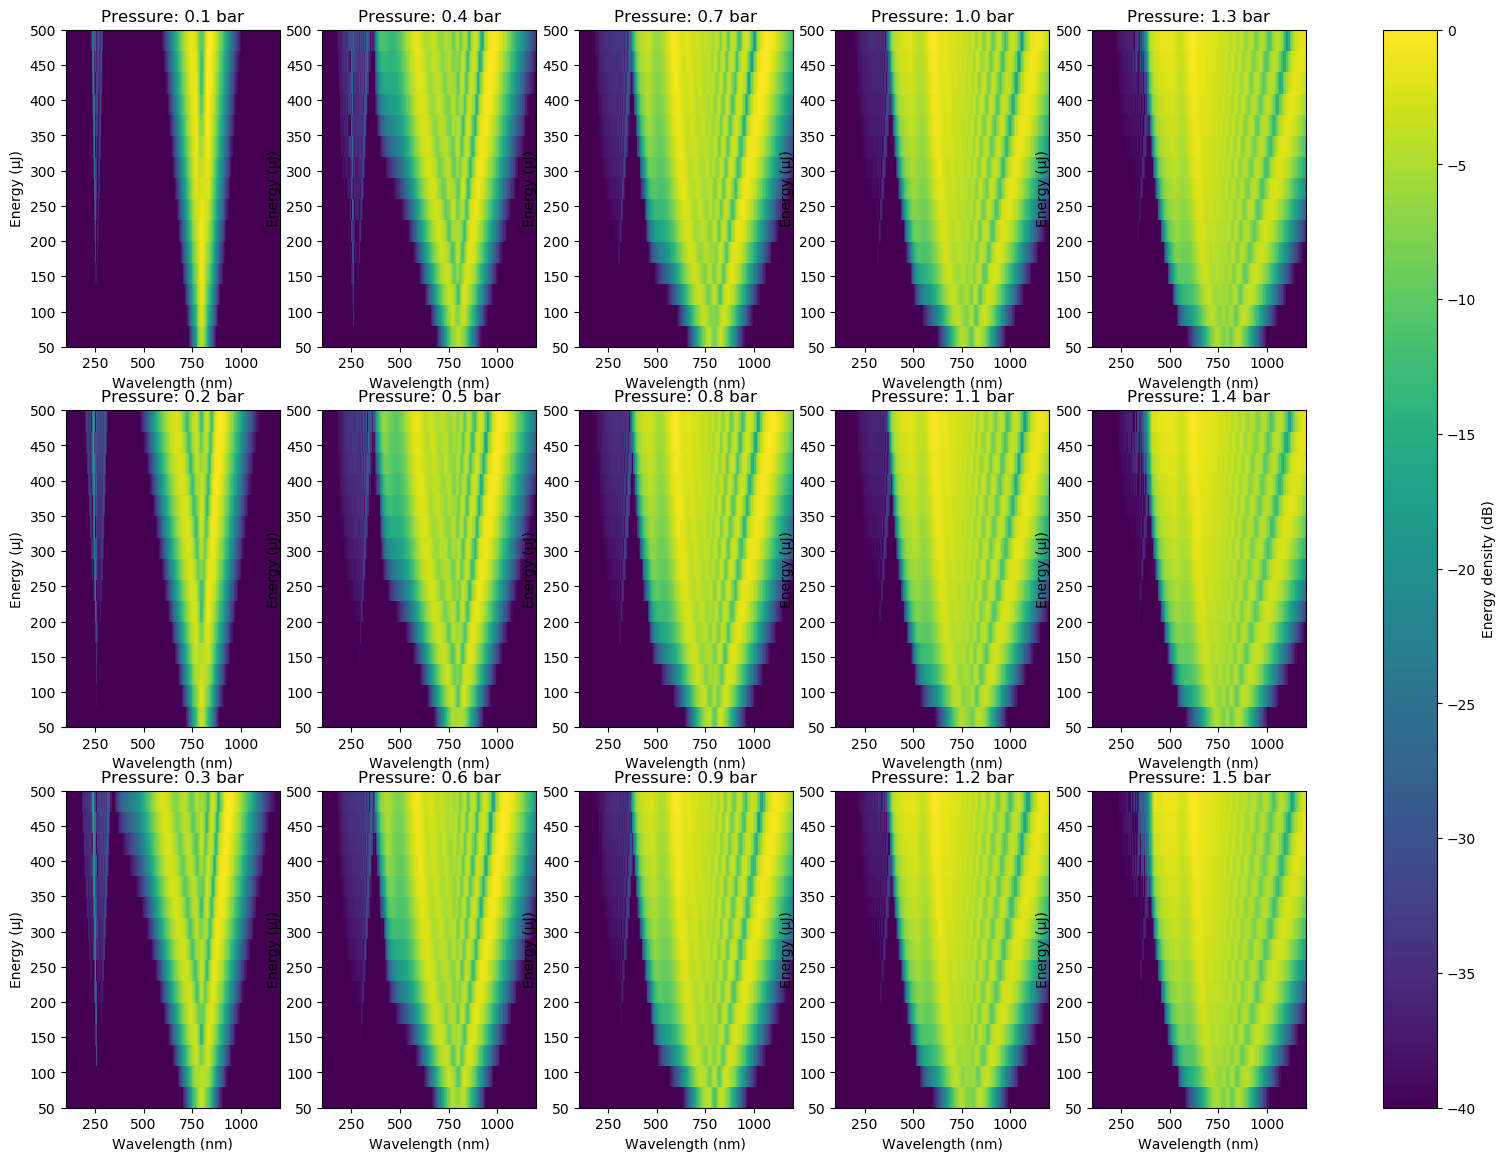

In [17]:
# Scan ranges - need to set for plotting (not pulled from files)
energies = collect(range(50e-6, 500e-6; length=16))
# energies = collect(50e-6:50e-6:500e-6)
pressures = collect(0.1:0.1:1.5)

fig, axs = plt.subplots(3, round(Int,length(pressures)/3))
fig.set_size_inches(20, 14)
for (pidx, pressure) in enumerate(pressures)
    ax = axs[pidx]
    global img = ax.pcolormesh(λ*1e9, energies*1e6, 10*Maths.log10_norm(Iλ[:, :, pidx])')
    img.set_clim(-40, 0)
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Energy (μJ)")
    ax.set_title("Pressure: $pressure bar")
    ax.set_xlim(100, 1200)
end
plt.colorbar(img, ax=axs, label="Energy density (dB)")

plt.savefig(scanName*".png", dpi=300, format="png")

In [15]:
# plt.savefig(scanName, dpi=300, format="png")

In [16]:
scanName*".png"

"pressure_energy_test_300123.png"